In [ ]:
import pandas as pd

In [ ]:
file1 = open('/content/Extrait_GHM21_IAV_2023.lst', 'r')
Lines = file1.readlines()

In [ ]:
print(Lines[5])

        5   34.141688   -6.558307     43.8684



In [ ]:
print(len(Lines))

306


In [ ]:
import re
we = []
index = 0
for line in  Lines:
  we.append(index)
  index = index + 1
data = pd.DataFrame(columns=["id" ,"phi", "lambdaa" , "ondulation"] , index = we)
pattern = r"-?\d+\.\d+|-?\d+"
i = 0
for i  in range(len(Lines)) :
  numbers = re.findall(pattern, Lines[i])
  id = int(numbers[0])
  phi = float(numbers[1])
  lambdaa = float(numbers[2])
  ondulation = float(numbers[3])
  # affectation des donnnee dans le tableau
  data.iloc[i].id         = id
  data.iloc[i].phi        =  phi
  data.iloc[i].lambdaa    = lambdaa
  data.iloc[i].ondulation = ondulation

In [ ]:
data

,id,phi,lambdaa,ondulation
0,0,34.141688,-6.641641,43.8752
1,1,34.141688,-6.624974,43.8747
2,2,34.141688,-6.608307,43.873
3,3,34.141688,-6.59164,43.8698
4,4,34.141688,-6.574974,43.8699
...,...,...,...,...
301,301,33.875021,-6.424973,46.8426
302,302,33.875021,-6.408307,46.8689
303,303,33.875021,-6.39164,46.8973
304,304,33.875021,-6.374973,46.9282


In [ ]:
# restructuration des donnees dans la forme adequate ,creation de la grille des donnee
# ecriture en trois forme , array in numpy  , fichier txt qui va etre lu par le logiciel , et un raster
# en mode  array : exrtaction des valuers unique de phi puis de lambda
# pour phi
phi = data.phi.unique()
lambdaa = list(data[data.phi == data.iloc[0].phi].lambdaa)
#formulation de la matrice :

In [ ]:
len(lambdaa)

18

In [ ]:
len(data.ondulation[:18])

18

In [ ]:
# slicing the dataframe to obtain the values
import numpy as np
import seaborn as sns
grid = np.zeros((17,18))

In [ ]:
for i in range(0 , len(data), 18):
  grid[i//18] =list(data.ondulation[i:i+18])

In [ ]:
print(grid)

[[43.8752 43.8747 43.873  43.8698 43.8699 43.8684 43.8708 43.8739 43.8826
  43.8906 43.9008 43.9095 43.9173 43.9263 43.9361 43.9435 43.9482 43.9566]
 [44.0193 44.021  44.0201 44.0201 44.0194 44.0218 44.0264 44.0336 44.0422
  44.0528 44.0626 44.0718 44.0838 44.0919 44.1006 44.1092 44.1164 44.1254]
 [44.1677 44.1702 44.1721 44.1727 44.1764 44.1805 44.1891 44.1977 44.2077
  44.2193 44.2299 44.2412 44.2529 44.2623 44.2723 44.2798 44.2882 44.2968]
 [44.3187 44.323  44.3254 44.3318 44.3375 44.347  44.3577 44.3682 44.3815
  44.3925 44.407  44.4174 44.4281 44.4396 44.4474 44.4566 44.4649 44.475 ]
 [44.4744 44.4801 44.4897 44.4973 44.5073 44.519  44.5307 44.5454 44.5604
  44.5725 44.5865 44.5987 44.6109 44.6201 44.6293 44.6381 44.6468 44.658 ]
 [44.6341 44.6457 44.6568 44.6689 44.6819 44.6951 44.71   44.7243 44.7394
  44.7553 44.7692 44.7832 44.7941 44.8044 44.8137 44.8231 44.8333 44.8501]
 [44.8011 44.8144 44.829  44.8438 44.8583 44.873  44.8884 44.9046 44.9215
  44.9392 44.9559 44.9693 44.981

In [ ]:
gride = pd.DataFrame(grid, index=phi, columns=lambdaa)
gride

,-6.641641,-6.624974,-6.608307,-6.591640,-6.574974,-6.558307,-6.541640,-6.524974,-6.508307,-6.491640,-6.474974,-6.458307,-6.441640,-6.424973,-6.408307,-6.391640,-6.374973,-6.358307
34.141688,43.8752,43.8747,43.8730,43.8698,43.8699,43.8684,43.8708,43.8739,43.8826,43.8906,43.9008,43.9095,43.9173,43.9263,43.9361,43.9435,43.9482,43.9566
34.125022,44.0193,44.0210,44.0201,44.0201,44.0194,44.0218,44.0264,44.0336,44.0422,44.0528,44.0626,44.0718,44.0838,44.0919,44.1006,44.1092,44.1164,44.1254
34.108355,44.1677,44.1702,44.1721,44.1727,44.1764,44.1805,44.1891,44.1977,44.2077,44.2193,44.2299,44.2412,44.2529,44.2623,44.2723,44.2798,44.2882,44.2968
34.091688,44.3187,44.3230,44.3254,44.3318,44.3375,44.3470,44.3577,44.3682,44.3815,44.3925,44.4070,44.4174,44.4281,44.4396,44.4474,44.4566,44.4649,44.4750
34.075021,44.4744,44.4801,44.4897,44.4973,44.5073,44.5190,44.5307,44.5454,44.5604,44.5725,44.5865,44.5987,44.6109,44.6201,44.6293,44.6381,44.6468,44.6580
34.058355,44.6341,44.6457,44.6568,44.6689,44.6819,44.6951,44.7100,44.7243,44.7394,44.7553,44.7692,44.7832,44.7941,44.8044,44.8137,44.8231,44.8333,44.8501
34.041688,44.8011,44.8144,44.8290,44.8438,44.8583,44.8730,44.8884,44.9046,44.9215,44.9392,44.9559,44.9693,44.9818,44.9918,45.0041,45.0139,45.0248,45.0382
34.025021,44.9702,44.9870,45.0039,45.0186,45.0353,45.0517,45.0674,45.0861,45.1038,45.1228,45.1411,45.1575,45.1708,45.1828,45.1946,45.2087,45.2208,45.2370
34.008355,45.1422,45.1593,45.1752,45.1937,45.2110,45.2315,45.2476,45.2648,45.2853,45.3072,45.3265,45.3443,45.3606,45.3747,45.3911,45.4055,45.4195,45.4337
33.991688,45.3100,45.3272,45.3475,45.3650,45.3889,45.4066,45.4258,45.4446,45.4675,45.4904,45.5124,45.5320,45.5494,45.5667,45.5856,45.6019,45.6193,45.6367


<Axes: >

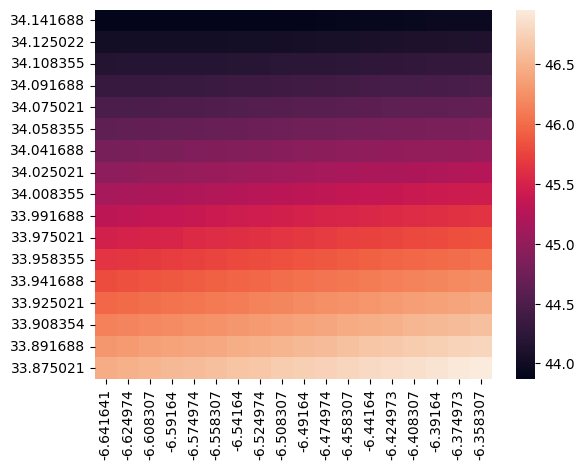

In [ ]:
sns.heatmap(gride)

In [ ]:
# create a tiff and export it
import numpy as np
import rasterio
from rasterio.transform import from_origin

def calculate_steps(latitudes, longitudes):
    """
    Calculate the step sizes for latitude and longitude based on data values.

    Parameters:
    latitudes (list): List of latitude values.
    longitudes (list): List of longitude values.

    Returns:
    (float, float): Tuple containing the latitude and longitude step sizes.
    """
    latitude_step = abs(latitudes[1] - latitudes[0])
    longitude_step = abs(longitudes[1] - longitudes[0])
    return latitude_step, longitude_step

def create_tiff(data , latitudes, longitudes, output_filename='output.tiff'):


    latitude_step, longitude_step = calculate_steps(latitudes, longitudes)

    transform = from_origin(longitudes[0], latitudes[0], longitude_step, latitude_step)

    with rasterio.open(
        output_filename, 'w', driver='GTiff',
        height=data.shape[0], width=data.shape[1],
        count=1, dtype=str(data.dtype),
        crs='+proj=latlong',
        transform=transform,
    ) as dst:
        dst.write(data, 1)

latitudes = phi
longitudes = lambdaa

# Create the TIFF file
create_tiff(grid, latitudes, longitudes)


In [ ]:
#exportation des valeurs sous format csv
gride.to_csv("geoide.csv" , sep = " ")

In [ ]:
gride.to_csv("geoide_raw.csv" , sep = " " , index=False , header = False )

In [ ]:
import re

text = "      305   33.875021   -6.358307     46.9586"
pattern = r"-?\d+\.\d+|-?\d+"

number1 = re.findall(pattern, text)
print(number1)
print(float(number1[2]))

['305', '33.875021', '-6.358307', '46.9586']
-6.358307
